# 1482. Minimum Number of Days to Make m Bouquets

### Difficulty: <font color = orange> Medium </font>

---
You are given an integer array `bloomDay`, an integer `m` and an integer `k`.

You want to make `m` bouquets. To make a bouquet, you need to use `k` adjacent flowers from the garden.

The garden consists of `n` flowers, the `ith` flower will bloom in the `bloomDay[i]` and then can be used in exactly one bouquet.

Return the minimum number of days you need to wait to be able to make `m` bouquets from the garden. If it is impossible to make `m` bouquets return `-1`.
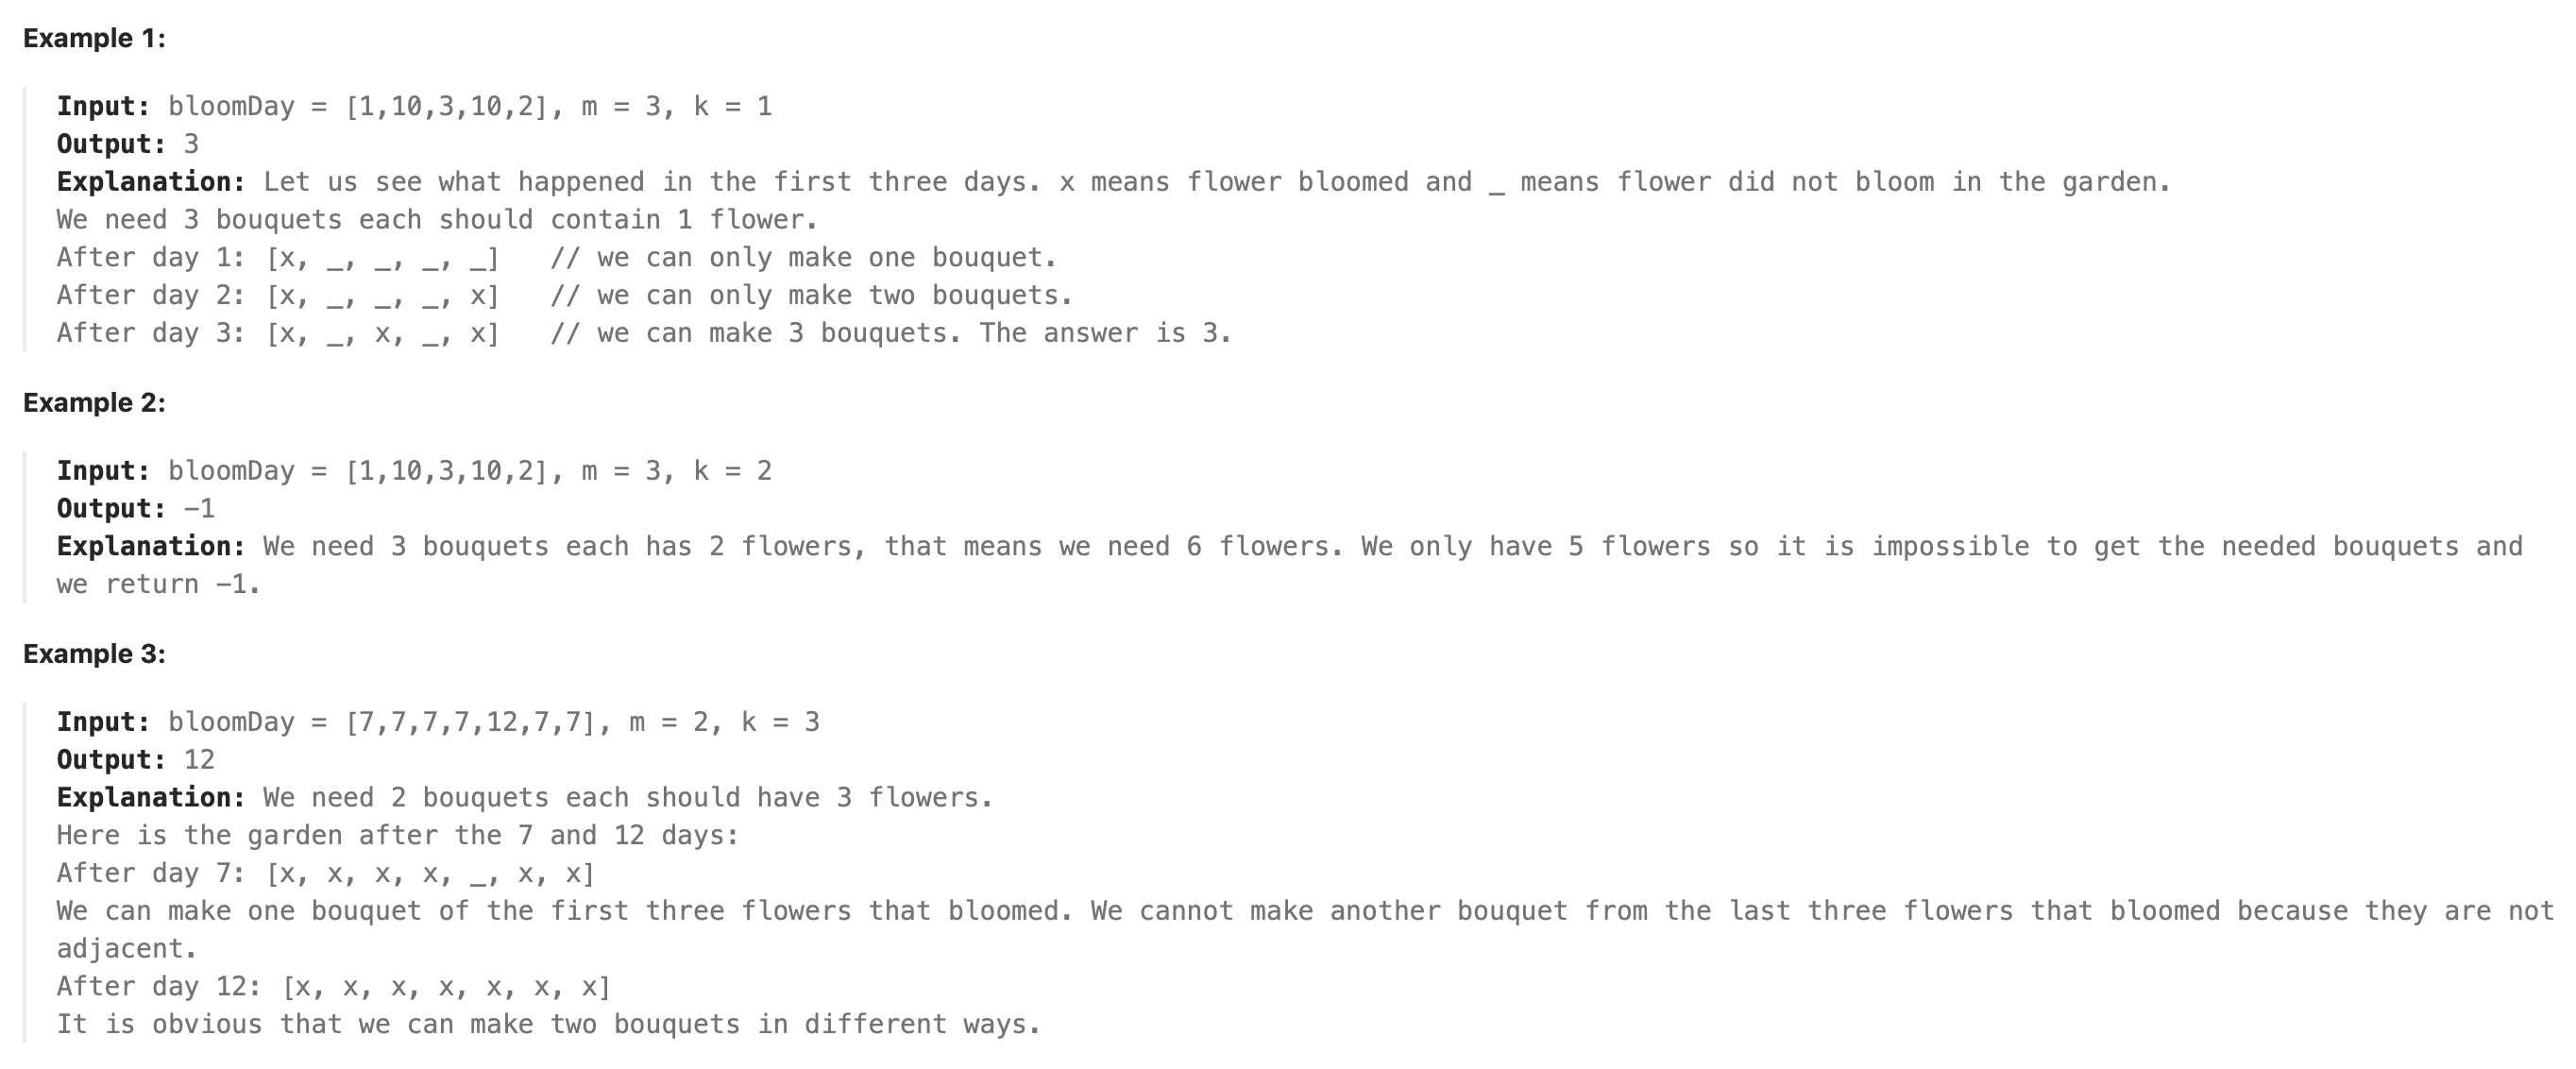


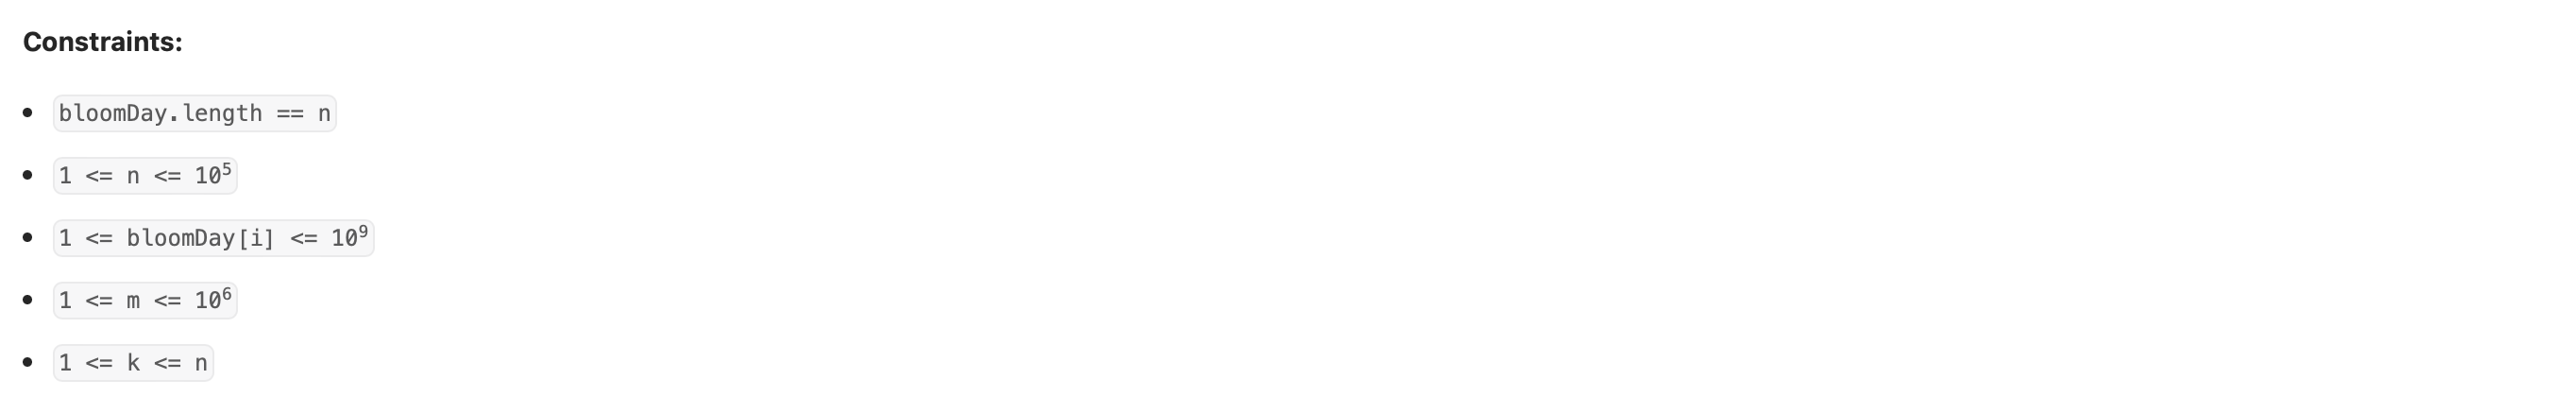

## Approach Overview:

Define the possible range of **time (measured in days) it will take to make m bouquets of flowers**. Using binary search, we find the smallest value in that time range (measured in days).
## Detailed Explanation:

I almost managed to solve this one. However, I got stuck on how to test if we can make `m` bouquets within the current days limit. I couln't figure out the manual methodical solution. 

Additionally, I didn't fully understand the requirement that only k adjacent flowers can be picked into a bouquet. Non-consecutive/non-adjacent flowers are not to be considered!

Anyway, lets take a look at the solution.

#### Testing if we can make `m` bouquets in `x` number of days.  

Loop through every bloom day in `bloomDay` array, for each one check if the current flower can bloom in time (i.e. check if number of days >= current bloom day) or if it cannot bloom in time (i.e. number of days < current bloom day). 

<b>If flower can bloom in time, then check if we can make a bouquet with it.</b>
 
`bouquet += (number of adjacently bloomed flowers + 1) // k`

If we don't have enough adjacently bloomed flowers that day, then we wont be able to make a bouquet (so number of bouquets made = 0). 

We use the variable `bouquet` to keep store of total number of bouquet's successfully made so far.

**KEY NOTE: A bouquet is successfully made if we have `k` number of adjacent bloomed flowers available.**

Once that is done, we then calculate the number of bloomed flowers we have available for future bouquets.

`flowers = (number of adjacently bloomed flowers + 1) % k`

<b>If current flower can NOT bloom in time, then we update the number of adjacent flowers to `0`</b>

`flowers = 0`


Finally. 

If `bouquet >= m` then we can make `m` number of flower bouquets in time. 

So we `return True`

Otherwise this means we can't and we will therefore need to consider a larger time limit (greater number of days). 

So `return False`

## Solution:

In [ ]:
class Solution:
    def minDays(self, bloomDay: List[int], m: int, k: int) -> int:
        def feasible(days):

            # initialize variable to store number of bouquets we can make
            bouquets = 0

            # initialize variable to store number of available bloomed flowers 
            flowers = 0

            # loop through bloom days
            for currentDay in bloomDay:
                
                # check current flower can NOT bloom in time
                if currentDay > days:

                    # if true, then update the number of adjacent flowers to 0
                    flowers = 0

                # otherwise flower can bloom in time 
                else:
                    
                    # Increment the number of adjacent bloomed flowers
                    flowers += 1

                    # Check if we have enough adjacent flowers to make a bouquet
                    if flowers == k:
                        
                        # Increment the number of bouquets
                        bouquets += 1
                        
                        # Reset the number of adjacent flowers for the next potential bouquet
                        flowers = 0
                        
            # return True if we can make atleast `m` bouquets within the time limit (measured in days)
            # return False if we can't 
            return bouquets >= m
        
        # edge case
        # check if we DO NOT have enough flowers to make `m` bouquets
        if len(bloomDay) < m * k:
            # if true, return -1
            return -1

        # initialize the lower bound (measured in days)
        left = 1

        # initialize the upper bound (measured in days)
        right = max(bloomDay)

        # loop until left and right pointer meet
        while left < right:

            # calculate the middle value of the current range
            mid = left + (right -left) // 2

            # check if we can make `m` bouquets in current time limit (i.e. mid)
            if feasible(mid):

                # narrow search range to find a smaller valid time limit (we do that by adjusting right pointer) 
                right = mid

            # else this means we can't, so current time limit must be too small
            else:
                # narrow search range to find a larger time limit (we do that by adjusting left pointer)
                left = mid + 1
        # return left (which represents the smallest possible number of days we can successfully make `m` bouquets of flowers)
        return left        